# Stock Market Analysis Project (Automotive)



### Part 0: Import
** Import the various libraries you will need-you can always just come back up here or import as you go along :) **

In [108]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pandas_datareader.data as web
import datetime
import plotly.graph_objects as go
from datetime import datetime

____
## Part 1: Getting the Data

### Tesla Stock (Ticker: TSLA on the NASDAQ)



In [78]:
start = datetime.datetime(2016, 1, 1)
end = datetime.datetime(2020, 1, 1)

In [79]:
Tesla = web.DataReader('TSLA','stooq',start,end)
Tesla.sort_index(inplace=True)

In [80]:
Tesla.head()

,Open,High,Low,Close,Volume
Date,,,,,
2015-01-08,212.81,213.80,210.01,210.62,3442304
2015-01-09,208.92,209.98,204.96,206.66,4668185
2015-01-12,203.05,204.47,199.25,202.21,5950245
2015-01-13,203.32,207.61,200.91,204.25,4447745
2015-01-14,185.83,195.20,185.00,192.69,11550804


In [81]:
GeneralMotors = web.DataReader('GM','stooq',start,end)

In [82]:
GeneralMotors.sort_index(inplace=True)

In [83]:
Ford = web.DataReader('F','stooq',start,end)

In [84]:
Ford.sort_index(inplace=True)

In [85]:
Toyota = web.DataReader('TM','stooq',start,end)

In [86]:
Toyota.sort_index(inplace=True)

In [87]:
Toyota.head()

,Open,High,Low,Close,Volume
Date,,,,,
2015-01-08,111.83,112.95,111.83,112.85,563899
2015-01-09,113.01,113.01,111.42,111.52,169940
2015-01-12,111.88,112.99,110.87,111.48,346858
2015-01-13,112.38,113.10,111.11,111.80,285902
2015-01-14,110.94,111.42,110.22,111.29,411736


## Part 2: Visualizing the Data

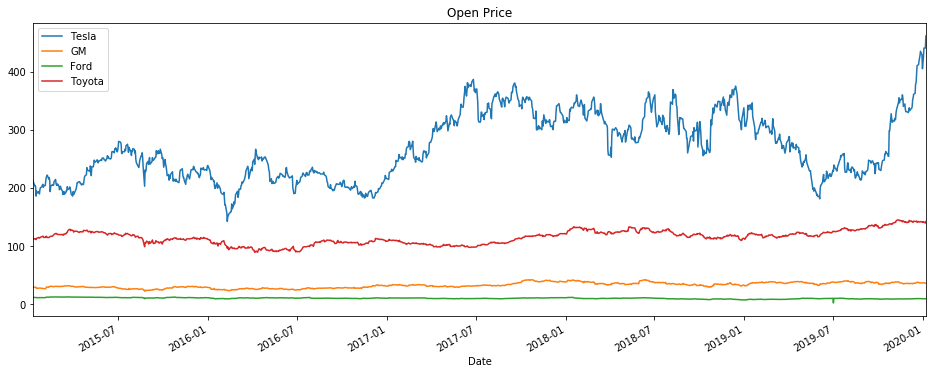

In [88]:
Tesla['Open'].plot(label='Tesla',figsize=(16,6),title='Open Price')
GeneralMotors['Open'].plot(label='GM',figsize=(16,6))
Ford['Open'].plot(label='Ford',figsize=(16,6))
Toyota['Open'].plot(label='Toyota',figsize=(16,6))
plt.legend()

** Plot the Volume of stock traded each day.**

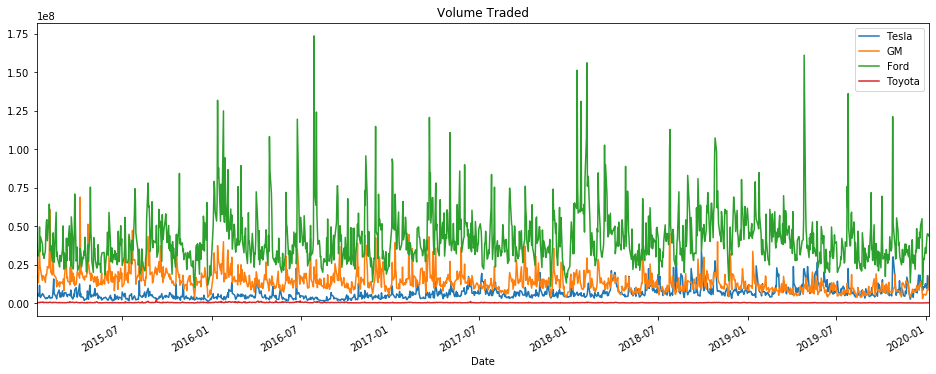

In [89]:
Tesla['Volume'].plot(label='Tesla',figsize=(16,6),title='Volume Traded')
GeneralMotors['Volume'].plot(label='GM',figsize=(16,6))
Ford['Volume'].plot(label='Ford',figsize=(16,6))
Toyota['Volume'].plot(label='Toyota',figsize=(16,6))
plt.legend()

** The Open Price Time Series Visualization makes Tesla look like its always been much more valuable as a company than GM and Ford. But to really understand this we would need to look at the total market cap of the company, not just the stock price. Unfortunately our current data doesn't have that information of total units of stock present. But what we can do as a simple calcualtion to try to represent total money traded would be to multply the Volume column by the Open price. Remember that this still isn't the actual Market Cap, its just a visual representation of the total amount of money being traded around using the time series. (e.g. 100 units of stock at \$10 each versus 100000 units of stock at $1 each)**

** Create a new column for each dataframe called "Total Traded" which is the Open Price multiplied by the Volume Traded.**

In [90]:
Tesla['Total Traded'] = Tesla['Open']*Tesla['Volume']
Ford['Total Traded'] = Ford['Open']*Ford['Volume']
GeneralMotors['Total Traded'] = GeneralMotors['Open']*GeneralMotors['Volume']
Toyota['Total Traded'] = Toyota['Open']*Toyota['Volume']

Text(0, 0.5, 'Total Traded')

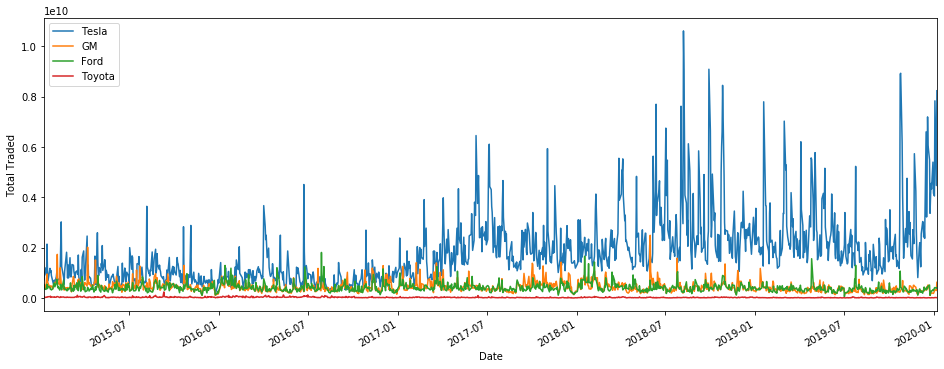

In [91]:
Tesla['Total Traded'].plot(label='Tesla',figsize=(16,6))
GeneralMotors['Total Traded'].plot(label='GM',figsize=(16,6))
Ford['Total Traded'].plot(label='Ford',figsize=(16,6))
Toyota['Total Traded'].plot(label='Toyota',figsize=(16,6))
plt.legend()
plt.ylabel('Total Traded')

** Interesting, looks like there was huge amount of money traded for Tesla somewhere in early 2014. What date was that and what happened? **

In [92]:
Tesla['Total Traded'].idxmax()

Timestamp('2018-08-07 00:00:00')

In [93]:
Tesla['Total Traded'].idxmax().value

1533600000000000000

____

Text(0.5, 1.0, 'Tesla Moving Average MA')

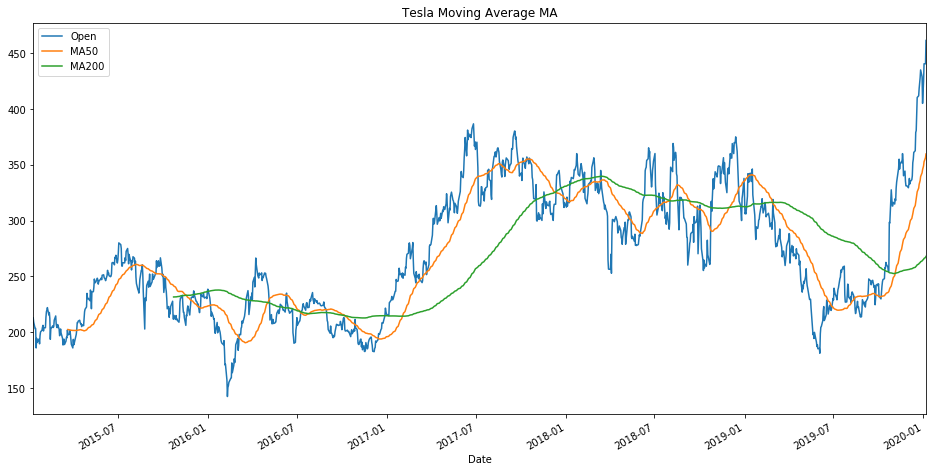

In [94]:
Tesla['MA50'] = Tesla['Open'].rolling(50).mean()
Tesla['MA200'] = Tesla['Open'].rolling(200).mean()
Tesla[['Open','MA50','MA200']].plot(label='Tesla',figsize=(16,8))
plt.title('Tesla Moving Average MA')

Text(0.5, 1.0, 'Ford Moving Average MA')

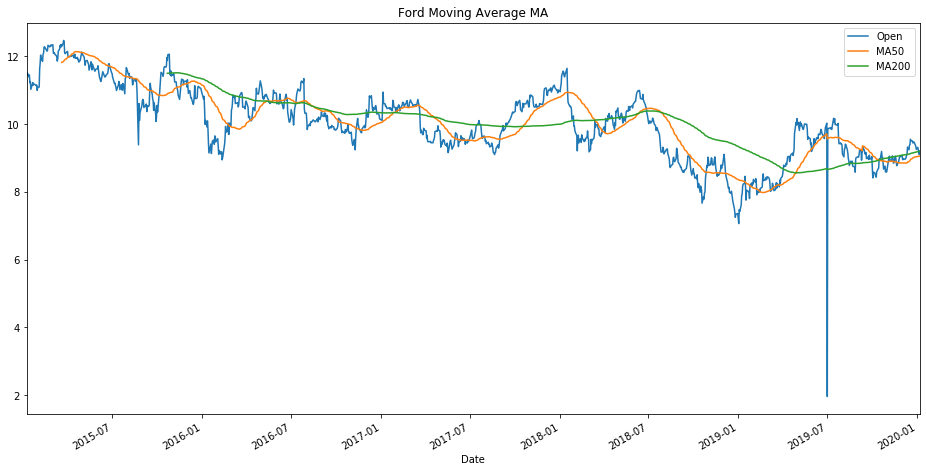

In [95]:
Ford['MA50'] = Ford['Open'].rolling(50).mean()
Ford['MA200'] = Ford['Open'].rolling(200).mean()
Ford[['Open','MA50','MA200']].plot(label='Ford',figsize=(16,8))
plt.title('Ford Moving Average MA')

Text(0.5, 1.0, 'Toyota Moving Average MA')

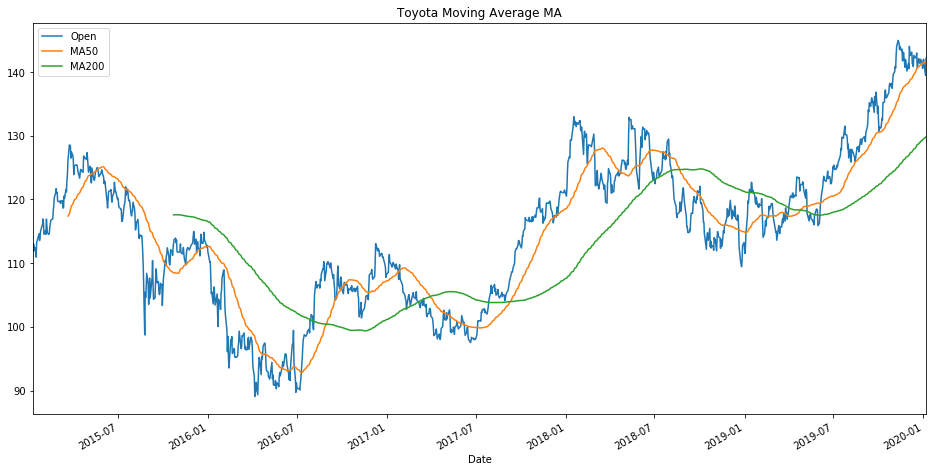

In [96]:
Toyota['MA50'] = Toyota['Open'].rolling(50).mean()
Toyota['MA200'] = Toyota['Open'].rolling(200).mean()
Toyota[['Open','MA50','MA200']].plot(label='Toyota',figsize=(16,8))
plt.title('Toyota Moving Average MA')

______

In [101]:
from pandas.plotting import scatter_matrix

In [97]:
Auto = pd.concat([Tesla['Open'],GeneralMotors['Open'],Ford['Open'],Toyota['Open']],axis=1)

In [99]:
Auto.columns = ['Tesla Open','GM Open','Ford Open','Toyota Open']

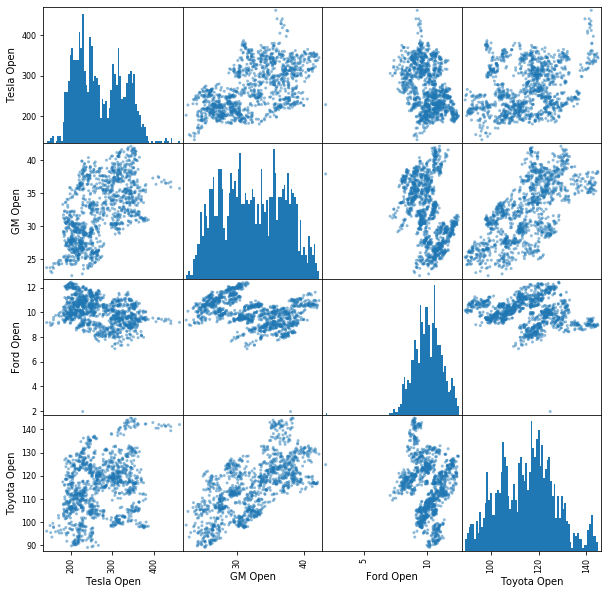

In [103]:
scatter_matrix(Auto,figsize=(10,10),alpha=0.5,hist_kwds={'bins':75});

In [112]:
fig = go.Figure(data=[go.Candlestick(x=Tesla.index,
                open=Tesla['Open'],
                high=Tesla['High'],
                low=Tesla['Low'],
                close=Tesla['Close'])])

fig.show()

____
# Part 3: Basic Financial Analysis

## Daily Percentage Change
First we will begin by calculating the daily percentage change. Daily percentage change is defined by the following formula:

$ r_t = \frac{p_t}{p_{t-1}} -1$

This defines r_t (return at time t) as equal to the price at time t divided by the price at time t-1 (the previous day) minus 1. Basically this just informs you of your percent gain (or loss) if you bought the stock on day and then sold it the next day. While this isn't necessarily helpful for attempting to predict future values of the stock, its very helpful in analyzing the volatility of the stock. If daily returns have a wide distribution, the stock is more volatile from one day to the next. Let's calculate the percent returns and then plot them with a histogram, and decide which stock is the most stable!

In [113]:
Tesla['returns'] = Tesla['Close'].pct_change(1)
GeneralMotors['returns'] = GeneralMotors['Close'].pct_change(1)
Ford['returns'] = Ford['Close'].pct_change(1)
Toyota['returns'] = Toyota['Close'].pct_change(1)

In [114]:
Tesla.head()

,Open,High,Low,Close,Volume,Total Traded,MA50,MA200,returns
Date,,,,,,,,,
2015-01-08,212.81,213.80,210.01,210.62,3442304,7.325567e+08,NaN,NaN,NaN
2015-01-09,208.92,209.98,204.96,206.66,4668185,9.752772e+08,NaN,NaN,-0.018802
2015-01-12,203.05,204.47,199.25,202.21,5950245,1.208197e+09,NaN,NaN,-0.021533
2015-01-13,203.32,207.61,200.91,204.25,4447745,9.043155e+08,NaN,NaN,0.010089
2015-01-14,185.83,195.20,185.00,192.69,11550804,2.146486e+09,NaN,NaN,-0.056597


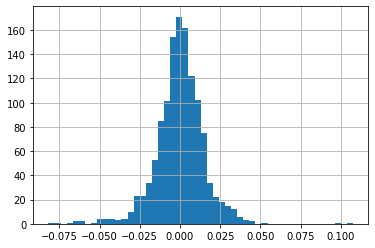

In [118]:
Ford['returns'].hist(bins=50)

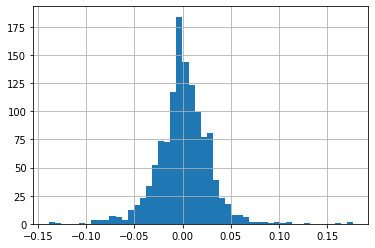

In [119]:
Tesla['returns'].hist(bins=50)

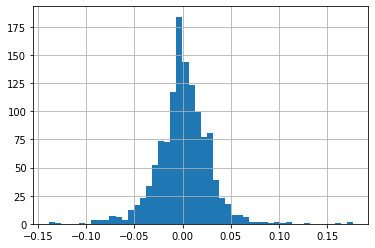

In [120]:
Tesla['returns'].hist(bins=50)

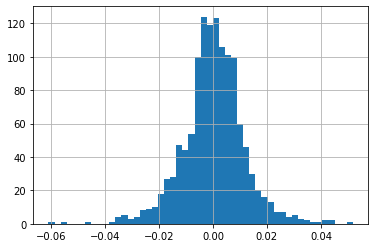

In [121]:
Toyota['returns'].hist(bins=50)

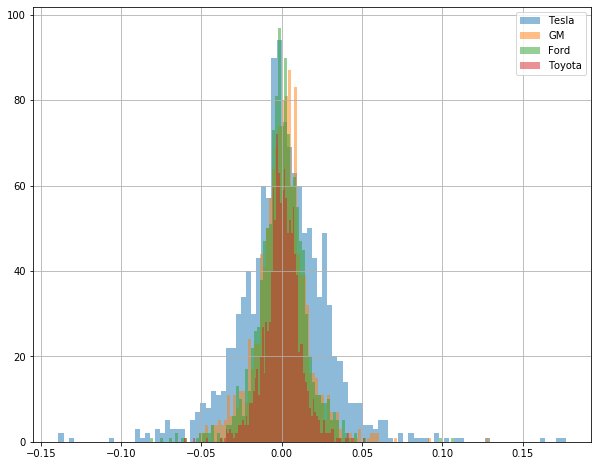

In [122]:
Tesla['returns'].hist(bins=100,label='Tesla',figsize=(10,8),alpha=0.5)
GeneralMotors['returns'].hist(bins=100,label='GM',alpha=0.5)
Ford['returns'].hist(bins=100,label='Ford',alpha=0.5)
Toyota['returns'].hist(bins=100,label='Toyota',alpha=0.5)
plt.legend()

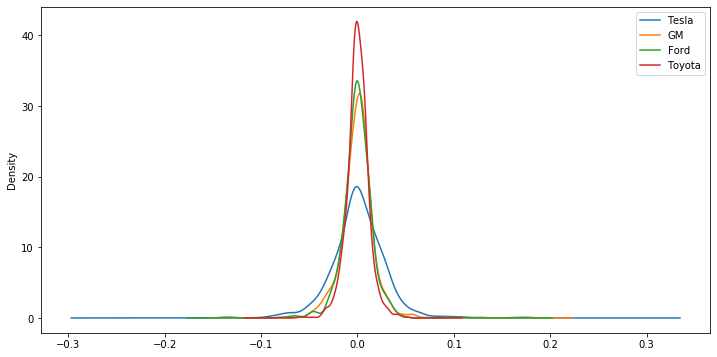

In [123]:
Tesla['returns'].plot(kind='kde',label='Tesla',figsize=(12,6))
GeneralMotors['returns'].plot(kind='kde',label='GM')
Ford['returns'].plot(kind='kde',label='Ford')
Toyota['returns'].plot(kind='kde',label='Toyota')
plt.legend()

## Comparing Daily Returns between Stocks

** Create a scatter matrix plot to see the correlation between each of the stocks daily returns. This helps answer the questions of how related the car companies are. Is Tesla begin treated more as a technology company rather than a car company by the market?**

In [125]:
Auto_df = pd.concat([Tesla['returns'],GeneralMotors['returns'],Ford['returns'],Toyota['returns']],axis=1)
Auto_df.columns = ['Tesla Returns',' GM Returns','Ford Returns','Toyota Returns']

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fb7447d72e8>,
      dtype=object)

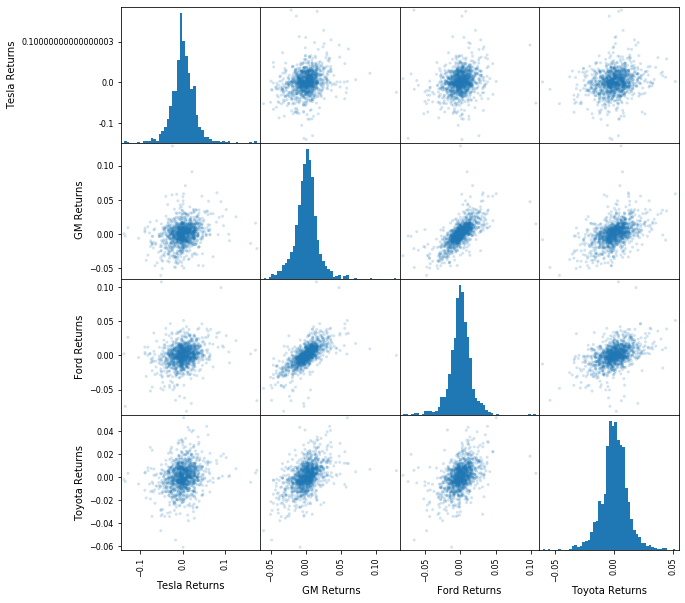

In [127]:
scatter_matrix(Auto_df,figsize=(10,10),alpha=0.2,hist_kwds={'bins':50})

____
## Cumulative Daily Returns

Great! Now we can see which stock was the most wide ranging in daily returns (you should have realized it was Tesla, our original stock price plot should have also made that obvious).

With daily cumulative returns, the question we are trying to answer is the following, if I invested $1 in the company at the beginning of the time series, how much would is be worth today? This is different than just the stock price at the current day, because it will take into account the daily returns. Keep in mind, our simple calculation here won't take into account stocks that give back a dividend. Let's look at some simple examples:

Lets us say there is a stock 'ABC' that is being actively traded on an exchange. ABC has the following prices corresponding to the dates given

    Date                        Price
    01/01/2018                   10
    01/02/2018                   15
    01/03/2018                   20
    01/04/2018                   25

**Daily Return** : Daily return is the profit/loss made by the stock compared to the previous day. (This is what ew just calculated above). A value above one indicates profit, similarly a value below one indicates loss. It is also expressed in percentage to convey the information better. (When expressed as percentage, if the value is above 0, the stock had give you profit else loss). So for the above example the daily returns would be

    Date                         Daily Return                  %Daily Return
    01/01/2018                 10/10 =  1                          -   
    01/02/2018                 15/10 =  3/2                       50%
    01/03/2018                 20/15 =  4/3                       33%
    01/04/2018                 25/20 =  5/4                       20%

**Cumulative Return**: While daily returns are useful, it doesn't give the investor a immediate insight into the gains he had made till date, especially if the stock is very volatile. Cumulative return is computed relative to the day investment is made.  If cumulative return is above one, you are making profits else you are in loss. So for the above example cumulative gains are as follows

    Date                       Cumulative Return         %Cumulative Return
    01/01/2018                  10/10 =  1                         100 %   
    01/02/2018                  15/10 =  3/2                       150 %
    01/03/2018                  20/10 =  2                         200 %
    01/04/2018                  25/10 =  5/2                       250 %

The formula for a cumulative daily return is:

$ i_i = (1+r_t) * i_{t-1} $

Here we can see we are just multiplying our previous investment at i at t-1 by 1+our percent returns. Pandas makes this very simple to calculate with its cumprod() method. Using something in the following manner:

    df[daily_cumulative_return] = ( 1 + df[pct_daily_return] ).cumprod()
    

** Create a cumulative daily return column for each car company's dataframe.**

In [128]:
Tesla['Cumulative Return'] = (1 + Tesla['returns']).cumprod()
GeneralMotors['Cumulative Return'] = (1 + GeneralMotors['returns']).cumprod()
Ford['Cumulative Return'] = (1 + Ford['returns']).cumprod()
Toyota['Cumulative Return'] = (1 + Toyota['returns']).cumprod()

In [129]:
Tesla.head()

,Open,High,Low,Close,Volume,Total Traded,MA50,MA200,returns,Cumulative Return
Date,,,,,,,,,,
2015-01-08,212.81,213.80,210.01,210.62,3442304,7.325567e+08,NaN,NaN,NaN,NaN
2015-01-09,208.92,209.98,204.96,206.66,4668185,9.752772e+08,NaN,NaN,-0.018802,0.981198
2015-01-12,203.05,204.47,199.25,202.21,5950245,1.208197e+09,NaN,NaN,-0.021533,0.960070
2015-01-13,203.32,207.61,200.91,204.25,4447745,9.043155e+08,NaN,NaN,0.010089,0.969756
2015-01-14,185.83,195.20,185.00,192.69,11550804,2.146486e+09,NaN,NaN,-0.056597,0.914870


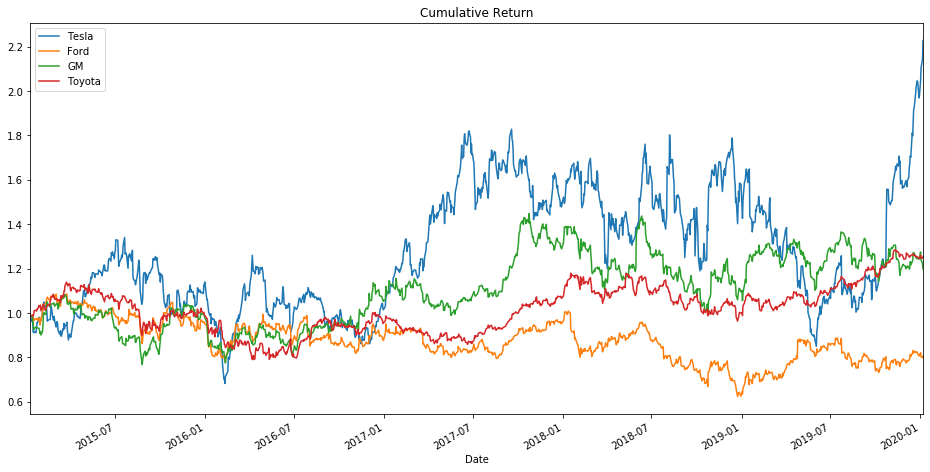

In [130]:
Tesla['Cumulative Return'].plot(label='Tesla',figsize=(16,8),title='Cumulative Return')
Ford['Cumulative Return'].plot(label='Ford')
GeneralMotors['Cumulative Return'].plot(label='GM')
Toyota['Cumulative Return'].plot(label='Toyota')
plt.legend()

## We can see that Tesla shows the highest rate of return per 1 dollar invested while Ford has the lowest rate of return.